In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('AP_Industrial_Policy_Dataset.csv')
df.head()

,Industry Name,Year,Investment (in Million INR),Employment Rate (%),Production Output (in Million INR),Infrastructure Score,Energy Consumption (in GWh),Government Incentives (in Million INR)
0,IT,2024,399,942,813,298,545,253
1,Mining,2023,458,390,369,264,902,539
2,Pharmaceutical,2023,44,977,237,687,95,111
3,Automobile,2024,47,785,182,521,866,206
4,Agriculture,2022,452,716,526,265,327,666


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Industry Name                           2500 non-null   object
 1   Year                                    2500 non-null   int64 
 2   Investment (in Million INR)             2500 non-null   int64 
 3   Employment Rate (%)                     2500 non-null   int64 
 4   Production Output (in Million INR)      2500 non-null   int64 
 5   Infrastructure Score                    2500 non-null   int64 
 6   Energy Consumption (in GWh)             2500 non-null   int64 
 7   Government Incentives (in Million INR)  2500 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 156.4+ KB


In [27]:
df.describe()

,Year,Investment (in Million INR),Employment Rate (%),Production Output (in Million INR),Infrastructure Score,Energy Consumption (in GWh),Government Incentives (in Million INR)
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,2022.022800,497.301600,503.337200,496.816400,509.295600,500.763200,500.917600
std,1.422635,290.042592,290.410773,287.143761,288.580886,286.078804,289.175171
min,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,245.000000,246.500000,249.000000,264.750000,253.000000,253.000000
50%,2022.000000,497.000000,511.000000,498.500000,505.000000,503.000000,497.000000
75%,2023.000000,751.000000,757.000000,747.000000,767.000000,743.750000,756.000000
max,2024.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,999.000000


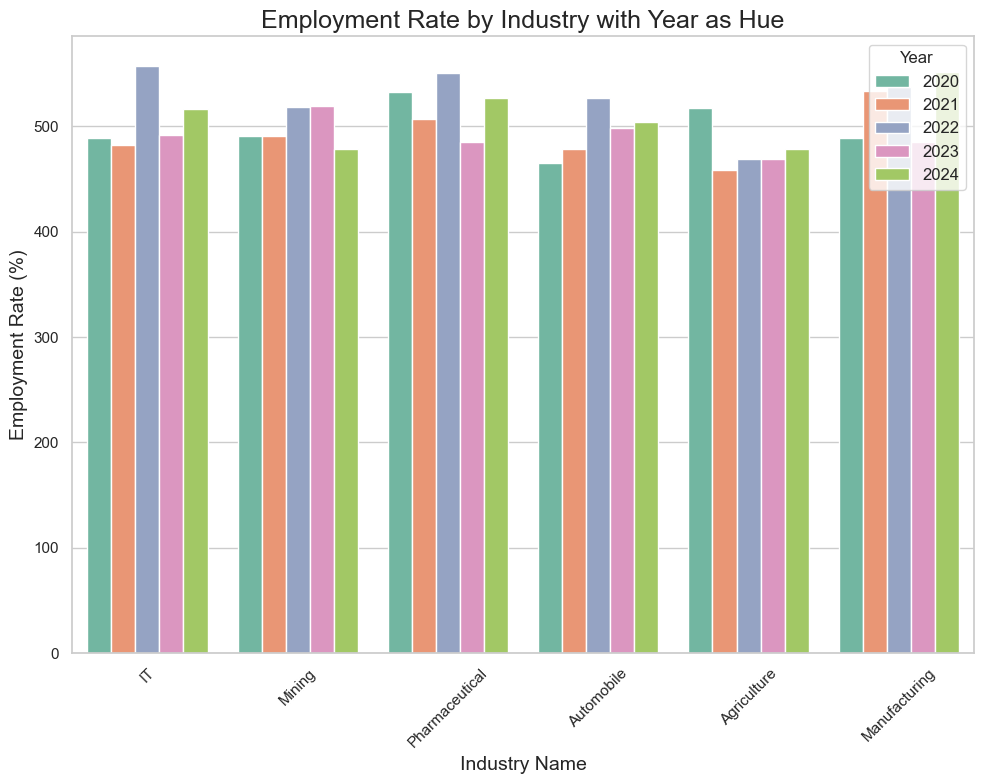

In [38]:
sns.set(style="whitegrid")

# Create the bar plot with 'Year' as hue
plt.figure(figsize=(10, 8))
sns.barplot(x='Industry Name', y='Employment Rate (%)', hue='Year', data=df, palette="Set2", errorbar=None)

# Customize the plot
plt.title('Employment Rate by Industry with Year as Hue', fontsize=18)
plt.xlabel('Industry Name', fontsize=14)
plt.ylabel('Employment Rate (%)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Year', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

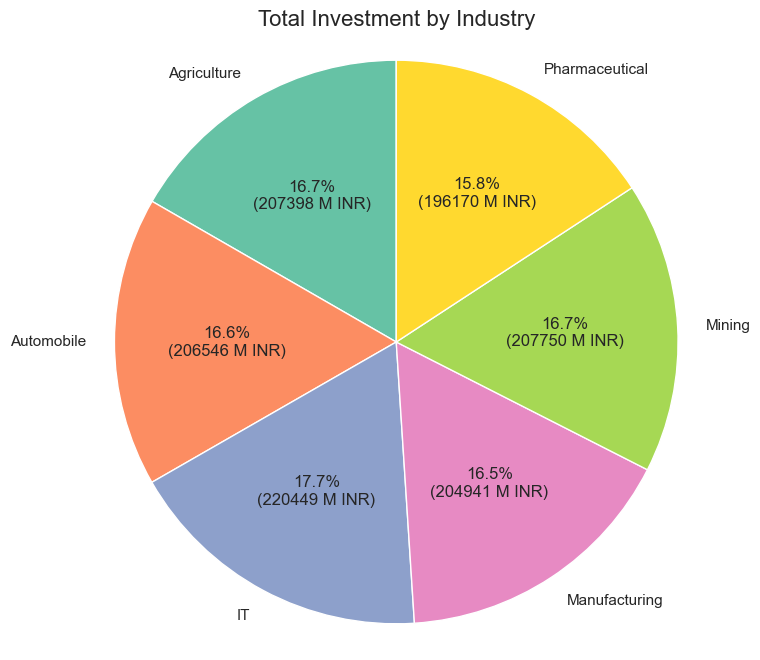

In [48]:
def my_autopct(pct):
    total = industry_investment.sum()
    val = pct * total / 100
    return f'{pct:.1f}%\n({val:.0f} M INR)'  # Format percentage and actual value
# Aggregate the data by 'Industry Name' to get the total investment for each industry
industry_investment = df.groupby('Industry Name')['Investment (in Million INR)'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(industry_investment, labels=industry_investment.index, autopct=my_autopct, startangle=90, colors=sns.color_palette("Set2"))

# Add a title
plt.title('Total Investment by Industry', fontsize=16)

# Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.axis('equal')

# Show the pie chart
plt.show()

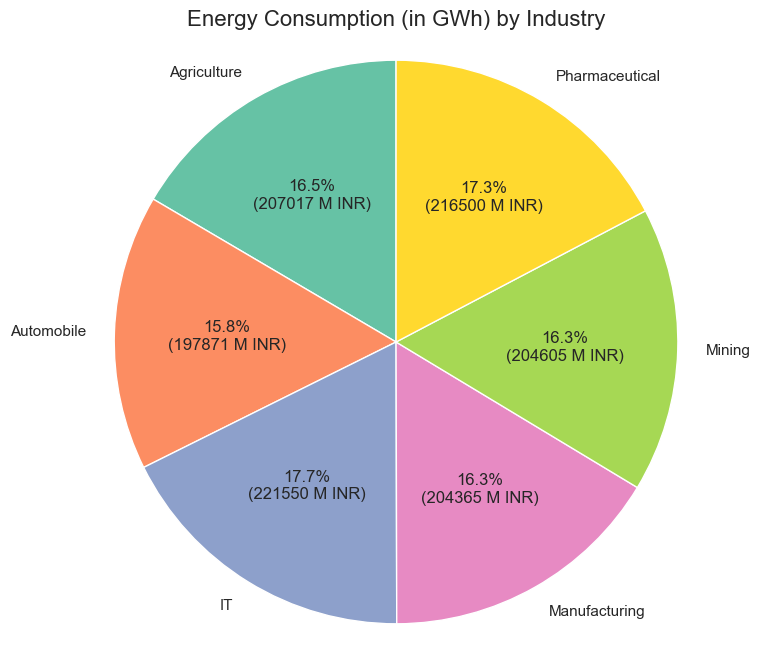

In [49]:
# Aggregate the data by 'Industry Name' to get the total investment for each industry
industry_investment = df.groupby('Industry Name')['Energy Consumption (in GWh)'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(industry_investment, labels=industry_investment.index, autopct=my_autopct, startangle=90, colors=sns.color_palette("Set2"))

# Add a title
plt.title('Energy Consumption (in GWh) by Industry', fontsize=16)

# Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.axis('equal')

# Show the pie chart
plt.show()

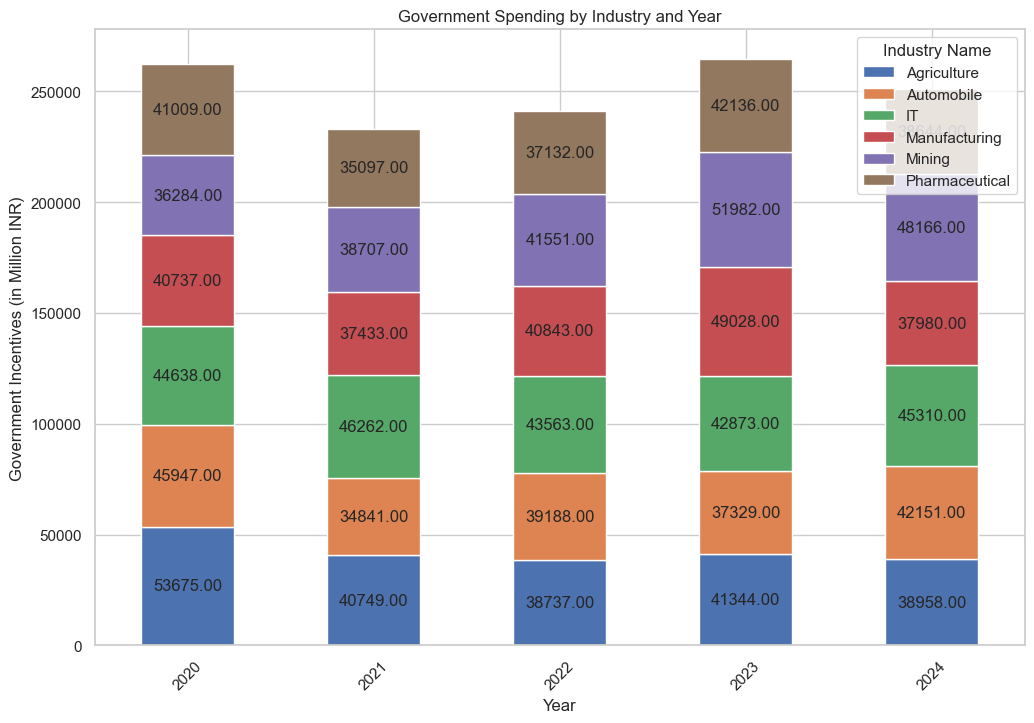

In [30]:
# Group the data by 'Industry Name' and 'Year' and sum the 'Government Incentives'
df_grouped = df.groupby(['Industry Name', 'Year'])['Government Incentives (in Million INR)'].sum().reset_index()

# Create a pivot table to reshape the data for plotting
df_pivot = df_grouped.pivot(index='Year', columns='Industry Name', values='Government Incentives (in Million INR)')
# Create the stacked bar chart
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

# Annotate the bars with values
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Government Spending by Industry and Year')
plt.xlabel('Year')
plt.ylabel('Government Incentives (in Million INR)')
plt.xticks(rotation=45)
plt.legend(title='Industry Name')
plt.show()